# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [156]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [157]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')


Let's take a look at the first 5 rows of each table:

In [4]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [158]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [8]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [9]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [10]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [11]:
ratings_by_title = data.groupby('title').size()

In [12]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [12]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [13]:
active_titles[:5]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)'],
      dtype='object', name=u'title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [14]:
mean_ratings = mean_ratings.ix[active_titles]

In [15]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [16]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [17]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [18]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [19]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [20]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [21]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [22]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [23]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


# Solution starts here

In [176]:
#For the following problems, genres were separated and a file containing that information was saved for future use. 

for row in data.itertuples():
    genre_list = row[10].split("|")
    for genre_type in genre_list:
        seperated = pd.DataFrame([[row[1], row[2], row[3], row[4], row[5],
                                   row[6], row[7], row[8], row[9], genre_type]],
                                columns=data.columns) 
        with open('genre_seperated.dat', 'a') as f:
            seperated.to_csv(f, sep='\t', header=False)

In [182]:
#import the table
data_genre_seperated = pd.read_table('genre_seperated.dat', sep='\t', header=None, names=data.columns, engine='python')

In [186]:
#checking that the table is imported and that genres are seperated
data_genre_seperated[6001:6007]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,76,2355,4,977846589,M,35,7,55413,"Bug's Life, A (1998)",Animation
0,76,2355,4,977846589,M,35,7,55413,"Bug's Life, A (1998)",Children's
0,76,2355,4,977846589,M,35,7,55413,"Bug's Life, A (1998)",Comedy
0,78,2355,4,978570873,F,45,1,98029,"Bug's Life, A (1998)",Animation
0,78,2355,4,978570873,F,45,1,98029,"Bug's Life, A (1998)",Children's
0,78,2355,4,978570873,F,45,1,98029,"Bug's Life, A (1998)",Comedy


In [187]:
#Problem 1: Aggregate of Movie Ratings for each genre
#Note: Since it did not specify to seperate by gender I didn't here, but I do so later
mean_ratings_for_genres = data_genre_seperated.pivot_table('rating', index='genres', aggfunc='mean')

In [191]:
mean_ratings_for_genres

genres
Action         3.491185
Adventure      3.477257
Animation      3.684895
Children's     3.422087
Comedy         3.522107
Crime          3.708679
Documentary    3.933123
Drama          3.766332
Fantasy        3.447371
Film-Noir      4.075188
Horror         3.215013
Musical        3.665519
Mystery        3.668102
Romance        3.607465
Sci-Fi         3.466521
Thriller       3.570466
War            3.893327
Western        3.637770
Name: rating, dtype: float64

In [194]:
#Aggregate of Movie Ratings for each particular genre seperated by gender
mean_genre_ratings_by_gender = data_genre_seperated.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')

In [195]:
mean_genre_ratings_by_gender

gender,F,M
genres,,
Action,3.490252,3.491386
Adventure,3.512879,3.468125
Animation,3.744785,3.661336
Children's,3.572628,3.358998
Comedy,3.571955,3.503671
Crime,3.689332,3.713720
Documentary,3.946392,3.928811
Drama,3.765662,3.766589
Fantasy,3.513076,3.426603


In [196]:
#Problem 2: Top 5 highest rated genres by Women
top_female_genres = mean_genre_ratings_by_gender.sort_values(by='F', ascending=False).head(5)

In [321]:
top_female_genres['F']

genres
Film-Noir      4.018087
Documentary    3.946392
War            3.893138
Musical        3.809108
Drama          3.765662
Name: F, dtype: float64

In [199]:
#Problem 3: Top 5 highest rated genres by Men
top_male_genres = mean_genre_ratings_by_gender.sort_values(by='M', ascending=False).head(5)

In [320]:
top_male_genres['M']

genres
Film-Noir      4.092254
Documentary    3.928811
War            3.893375
Drama          3.766589
Crime          3.713720
Name: M, dtype: float64

In [208]:
# Problem 4: Breakdown of Movie By Age for Shawshank Redemption
# One of my favorite movies plus it was filmed in my home town 
shawshankRating = data[data['title'] == "Shawshank Redemption, The (1994)"]

In [202]:
shawshankByAge = data.pivot_table('rating', index='age', aggfunc='mean')

In [206]:
#Note key for ages:
#1 represents anyone under 18
#18 represents those 18-24
#25 represents those 25-34
#35 represents those 35-44
#45 represents those 45-49
#50 represents those 50-55
#56 represents those 56+
shawshankByAge

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64

In [209]:
# Problem 5:
# Given a user_id and a movie_id, returns a list of user_ids for other users that gave
# the movie the same score

def usersWithSameRating(user_id, movie_id):
    movie_data = data[data['movie_id'] == movie_id]
    user_rating_row = movie_data[movie_data['user_id'] == user_id]
    user_rating = int(user_rating_row['rating'])
    same_rating = movie_data[movie_data['rating'] == user_rating]
    return list(same_rating['user_id'])

In [210]:
# testing function
usersWithSameRating(1, 1193)[:5]

[1, 2, 17, 19, 24]

In [216]:
# Problem 6: something else done with the data
# I'm curious to see if different age groups apreciate different genres.
#So I start  by examining the mean ratings for each genre by age.
mean_ratings_of_genre_by_age = data_genre_seperated.pivot_table('rating', index='genres', columns='age', aggfunc='mean')

In [217]:
mean_ratings_of_genre_by_age

age,1,18,25,35,45,50,56
genres,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624124,3.701118,3.740764,3.734856,3.780020,3.756233
Children's,3.241642,3.294382,3.426846,3.518598,3.527593,3.556555,3.621822
Comedy,3.497491,3.460440,3.490378,3.562017,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


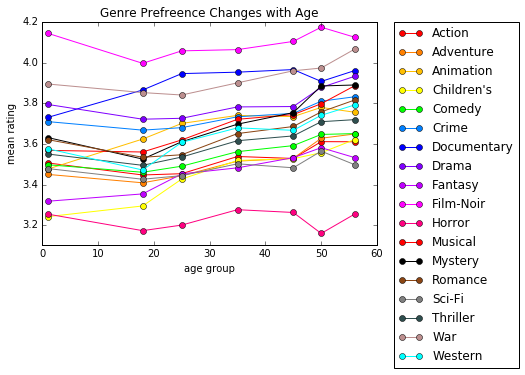

In [322]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the data below:
colors = ['#ff0000', '#ff8000', '#ffbf00', '#ffff00', '#00ff00', 
          '#0080ff', '#0000ff', '#8000ff', '#bf00ff', '#ff00ff',
          '#ff0080', '#ff0000', 'k', '#8b4513', '#808080',
          '#2f4f4f', '#bc8f8f', '#00ffff']
for x in range(0, len(mean_ratings_of_genre_by_age.values)):
    plt.plot(mean_ratings_of_genre_by_age.columns, 
             mean_ratings_of_genre_by_age.values[x], 
             'o-',
             color=colors[x],
             linewidth=1,
             label=mean_ratings_of_genre_by_age.axes[0][x])

plt.title('Genre Prefreence Changes with Age')
plt.ylabel('mean rating')
plt.xlabel('age group')
plt.axis([0, 60, 3.1, 4.2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Note that the position of the plot points are at the start of the age range 
# of the corresponding age group. So 1-17 is at 1, 18-24 is at 18, etc

Huge differenes in preference where not seen by age. The 4 most popular genres: Film-Noir, Documentary, War, and Drama remained in the top 5 in all age groups. Horor was the least popular for all age groups except the under 18 
group for which it just barely beats out Children's

Some of the more interesting patterns weren't the diffrences in preference but the difference in the criticalness between groups. Younger individuals tended to give lower ratings than older individuals. The 18-24 age group rated every genre lower than the 56+ age group. For most genres the ratings steadily increased with age. The under 18 demographic was somewhat less critical than the 18-24 group causing there to be a noticable dip before a gradual climb for several of the genres across age groups.

There was also less spread in the ratings of older individuals if one excludes the low rated Horor genre. 

Children's, which ironically was appreciated least by actual children, climbed more than most other genres such that it was only 5th least popular in the 56+ group. Animation, which shares a lot of overlap with Children's, also showed good movement with increasing age. It is 5th least popular for the under 18 group and is 5th most popular in the age 25-34 group, at which point the ratings started to level off causing it to get surpassed by several other genres to end as the 10th most popular.

Caveats: Since the ratings are set by people who voluntarily watched the movies, and people are unlikely to watch a movie they know they won't like, ratings might be more reflective of the difference between expectations and experience. If, for example, an individual doesn't like Westerns, they probably won't watch or rate them. Perhaps combining the number of times a genre is rated by age group in addition to the actual rating would be a better indication of the actual popularity of that genre by that age group. But this isn't as straightforward as it seems.  Doing so would require us to also control for the fact that some genres have more films than others meaning they could be watched more even if this genre is less liked. 

In [319]:
#Additional Tables relevant to problem 6.
#Each table is sorted by preference of a different age group

#Arranged in order of preference of under 18 group (age 1)
mean_ratings_of_genre_by_age.sort_values(by=1, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549


In [221]:
#Arranged in order of preference of 18-24 group (age 18)
mean_ratings_of_genre_by_age.sort_values(by=18, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549


In [223]:
#Arranged in order of preference of 25-34 group (age 25)
mean_ratings_of_genre_by_age.sort_values(by=25, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Animation,3.476113,3.624124,3.701118,3.740764,3.734856,3.780020,3.756233


In [225]:
#Arranged in order of preference of 35-44 group (age 35)
mean_ratings_of_genre_by_age.sort_values(by=35, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Animation,3.476113,3.624124,3.701118,3.740764,3.734856,3.780020,3.756233


In [226]:
#Arranged in order of preference of 45-49 group (age 45)
mean_ratings_of_genre_by_age.sort_values(by=45, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Mystery,3.631522,3.525387,3.610818,3.697396,3.754350,3.885795,3.890545


In [227]:
#Arranged in order of preference of 50-55 group (age 50)
mean_ratings_of_genre_by_age.sort_values(by=50, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Mystery,3.631522,3.525387,3.610818,3.697396,3.754350,3.885795,3.890545
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465


In [318]:
#Arranged in order of preference of 56+ group (age 56)
mean_ratings_of_genre_by_age.sort_values(by=56, ascending=False).head(5)

age,1,18,25,35,45,50,56
genres,,,,,,,
Film-Noir,4.145455,3.997368,4.058725,4.064910,4.105376,4.175401,4.125932
War,3.895437,3.853136,3.841240,3.901130,3.960554,3.974184,4.067285
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Mystery,3.631522,3.525387,3.610818,3.697396,3.754350,3.885795,3.890545
